In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### DATA PREPROCESSING

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [7]:
cnn = tf.keras.models.Sequential()

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [14]:
cnn.add(tf.keras.layers.Flatten())

In [15]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [16]:
cnn.add(tf.keras.layers.Dropout(0.4)) 

In [17]:
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

#### Training


In [18]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
cnn.summary()                            

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [20]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 4038s 2s/step - loss: 1.4828 - accuracy: 0.5675 - val_loss: 0.5154 - val_accuracy: 0.8407
Epoch 2/10
2197/2197 [==============================] - 5855s 3s/step - loss: 0.4730 - accuracy: 0.8512 - val_loss: 0.3317 - val_accuracy: 0.8977
Epoch 3/10
2197/2197 [==============================] - 5052s 2s/step - loss: 0.2779 - accuracy: 0.9096 - val_loss: 0.3713 - val_accuracy: 0.8836
Epoch 4/10
2197/2197 [==============================] - 4227s 2s/step - loss: 0.1950 - accuracy: 0.9361 - val_loss: 0.1684 - val_accuracy: 0.9447
Epoch 5/10
2197/2197 [==============================] - 4063s 2s/step - loss: 0.1465 - accuracy: 0.9499 - val_loss: 0.1644 - val_accuracy: 0.9495
Epoch 6/10
2197/2197 [==============================] - 4183s 2s/step - loss: 0.1118 - accuracy: 0.9628 - val_loss: 0.1399 - val_accuracy: 0.9576
Epoch 7/10
2197/2197 [==============================] - 4113s 2s/step - loss: 0.0902 - accuracy: 0.9704 - val_loss: 0.1225 -

In [21]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 926s 421ms/step - loss: 0.0496 - accuracy: 0.9850
Training accuracy: 0.9850487112998962


In [22]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 228s 414ms/step - loss: 0.1647 - accuracy: 0.9553
Validation accuracy: 0.9553266763687134


In [23]:
cnn.save('trained_plant_disease_model.keras')

In [24]:
training_history.history 

{'loss': [1.4827996492385864,
  0.47298499941825867,
  0.27790385484695435,
  0.19498275220394135,
  0.1464833766222,
  0.11181134730577469,
  0.090198814868927,
  0.07502562552690506,
  0.06221463158726692,
  0.058377861976623535],
 'accuracy': [0.5674656629562378,
  0.8511700630187988,
  0.9096094965934753,
  0.9360978603363037,
  0.9499395489692688,
  0.9627711772918701,
  0.9703534841537476,
  0.9754320979118347,
  0.9795575737953186,
  0.980837881565094],
 'val_loss': [0.5153802633285522,
  0.33168983459472656,
  0.37133604288101196,
  0.1684001386165619,
  0.16438527405261993,
  0.13987590372562408,
  0.12250912189483643,
  0.11056973785161972,
  0.1223904937505722,
  0.16471078991889954],
 'val_accuracy': [0.8407124876976013,
  0.897735059261322,
  0.8835647702217102,
  0.9447416067123413,
  0.9494650363922119,
  0.9576029777526855,
  0.9643751382827759,
  0.9684725403785706,
  0.9635784029960632,
  0.9553266763687134]}

In [25]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [26]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


#### Accuarcy Visualization

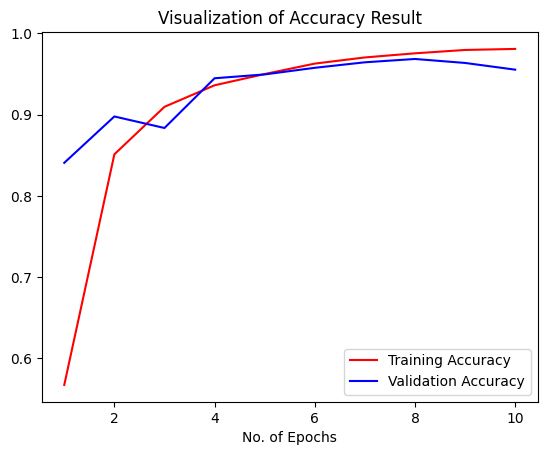

In [27]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [28]:
class_name = validation_set.class_names

In [29]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [30]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 820s 47ms/step


In [31]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [32]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [33]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [34]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [35]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.95      0.95      0.95       504
                                 Apple___Black_rot       0.95      0.99      0.97       497
                          Apple___Cedar_apple_rust       0.94      0.99      0.96       440
                                   Apple___healthy       0.95      0.95      0.95       502
                               Blueberry___healthy       0.94      0.99      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.92      1.00      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.85      0.90       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.86      0.99      0.

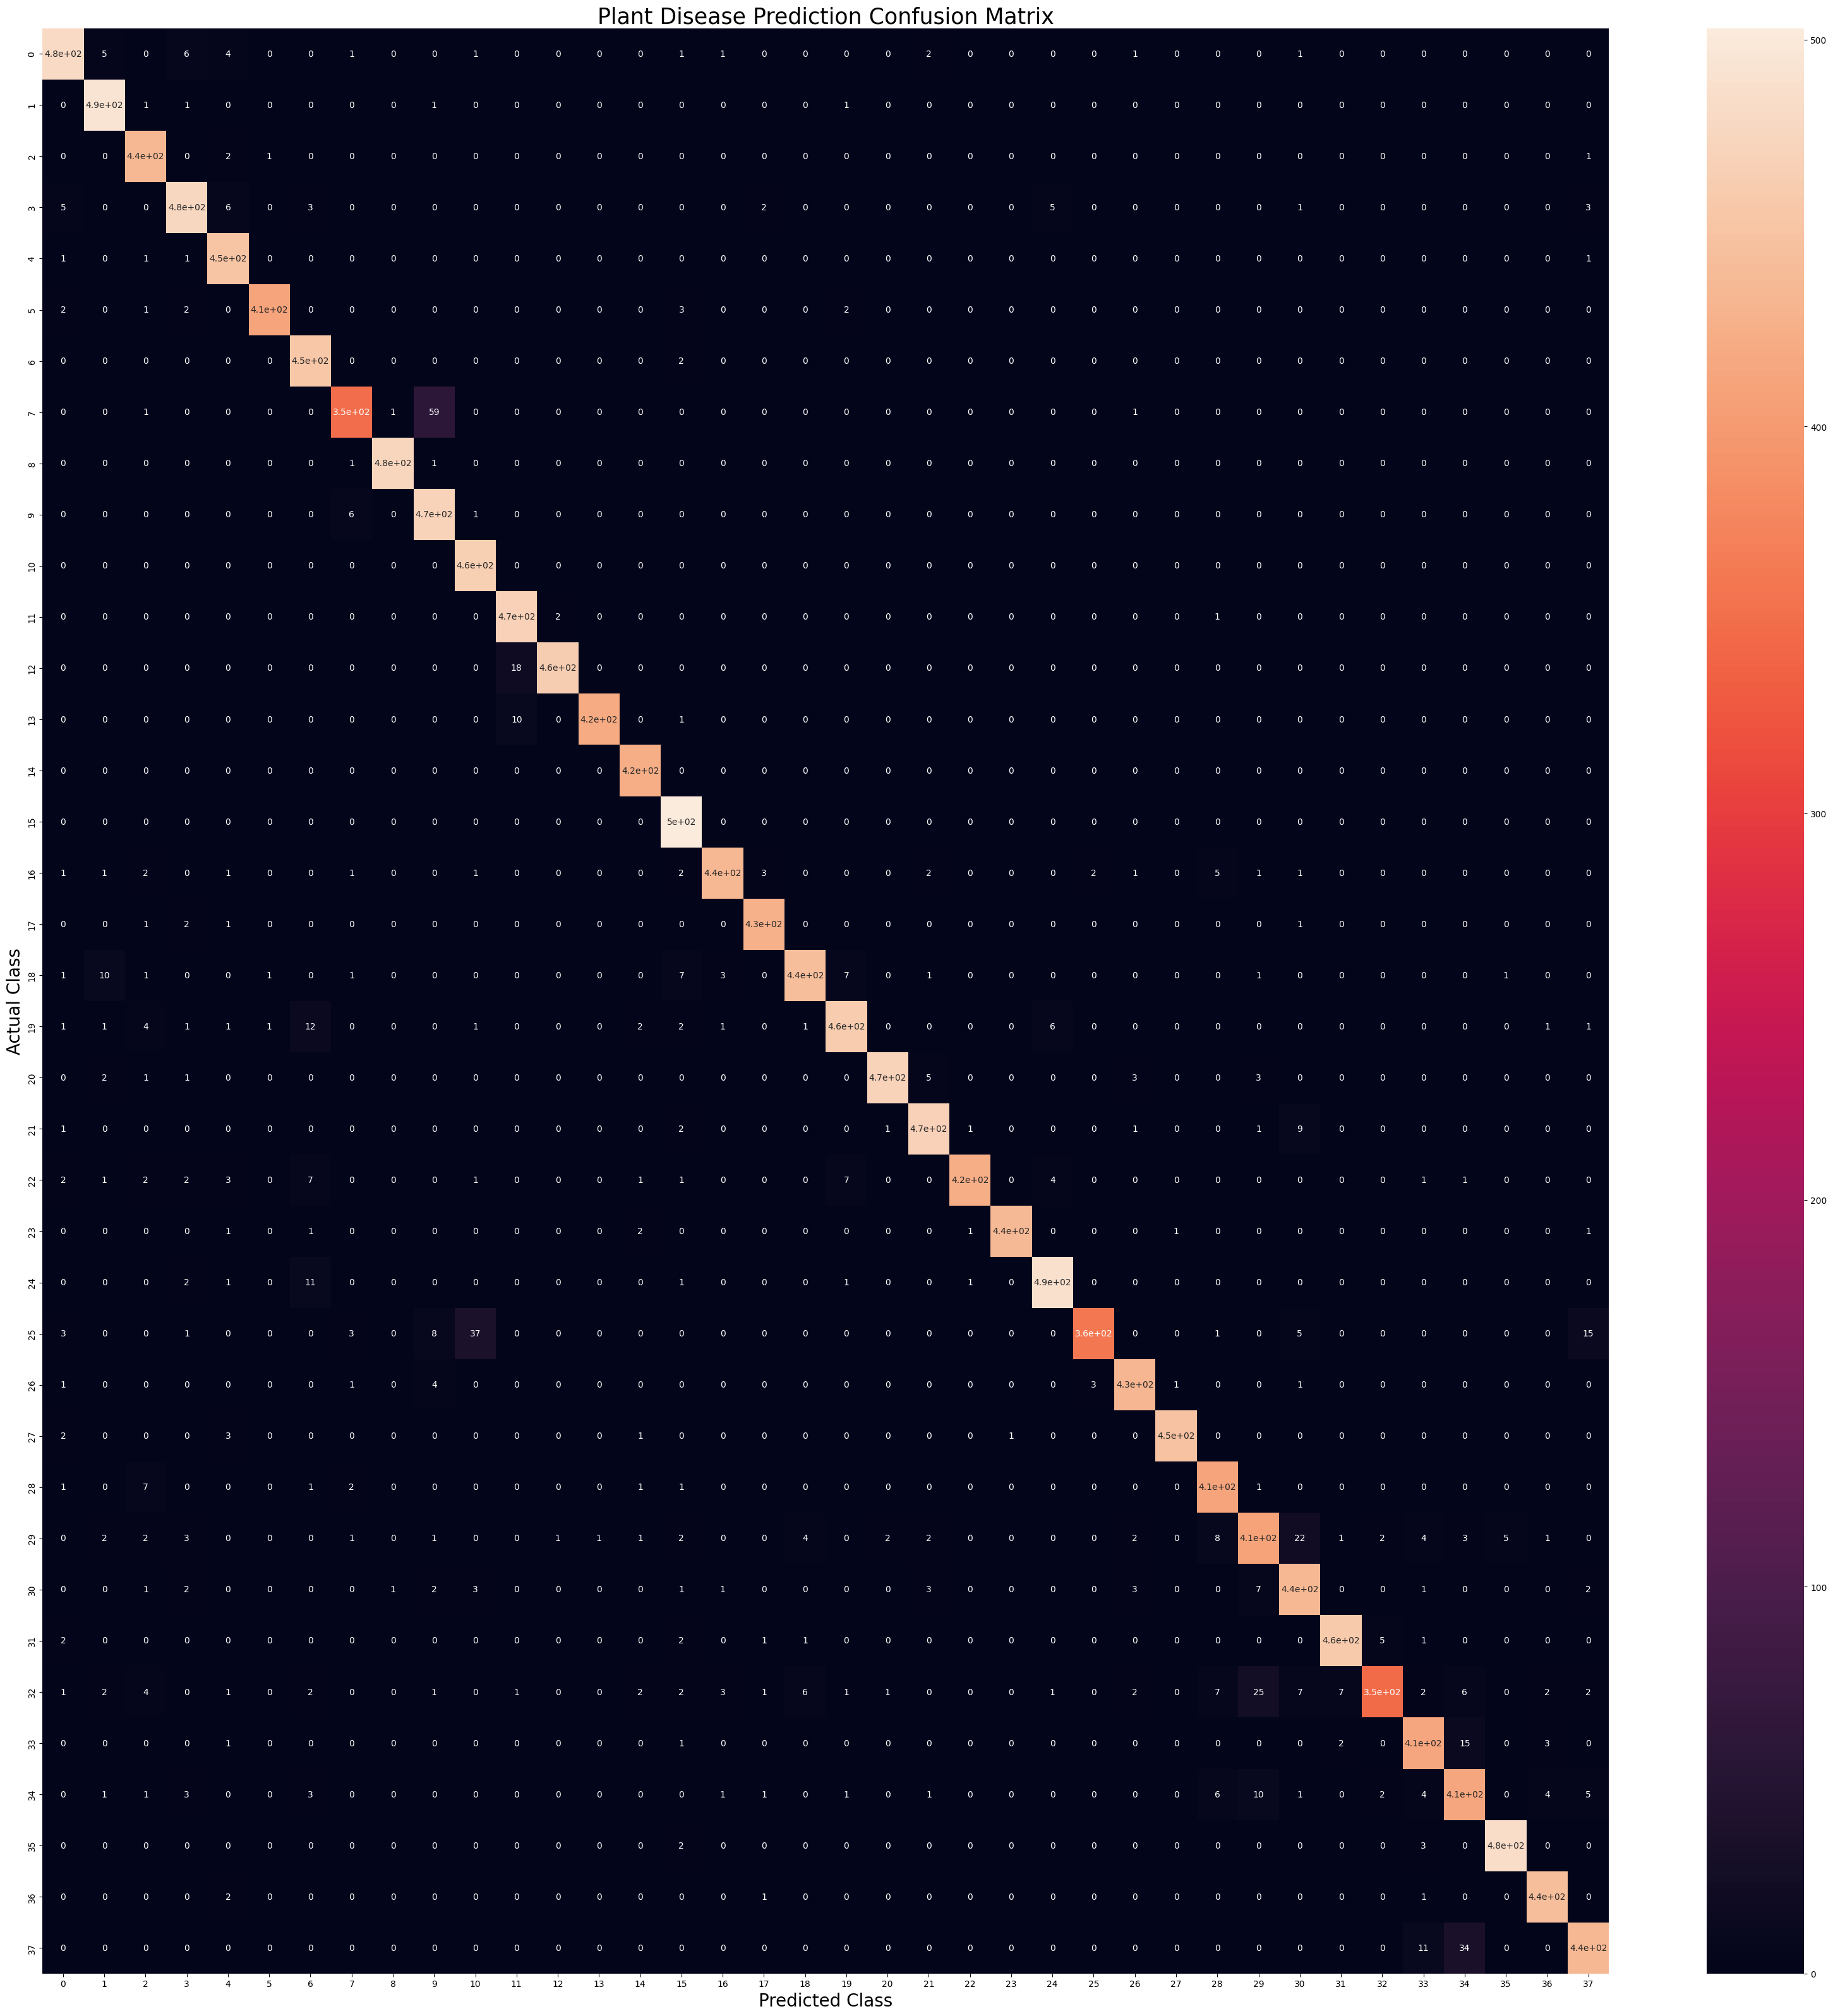

In [36]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()